In [1]:
import os
import sys
import numpy as np
import pandas as pd
import IPython.display

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter

# load other modules --> repo root path
sys.path.insert(0, "../")

from utils import text
from utils import audio
from utils.logging import Logger
from params.params import Params as hp
from dataset.dataset import TextToSpeechDatasetCollection

### Load parameters 

In [2]:
hp.load("../params/analyze.json")

### Load dataset and prepare data

In [3]:
dataset = "ljspeech"
dataset_root = "../data/" + dataset
data = TextToSpeechDatasetCollection(dataset_root)
data_fold = data.train

In [4]:
durations = []
lengths = []
num_words = []
lengths_phon = []
freq_phon = Counter()

for item in data_fold.items:      
    audio_path = item['audio']
    full_audio_path = os.path.join(dataset_root, audio_path)
    waveform = audio.load(full_audio_path)
    durations.append(audio.duration(waveform))
        
    utterance = text.to_text(item['text'], used_phonemes=False)
    clear_utterance = text.remove_punctuation(utterance)
    clear_words = clear_utterance.split()    
    lengths.append(len(utterance))
    num_words.append(len(clear_words))
     
    utterance_pho = text.to_text(item['phonemes'], used_phonemes=True)
    lengths_phon.append(len(utterance))
    utterance_pho = utterance_pho.replace(' ', '')
    freq_phon.update(utterance_pho)

## Audio & Spectrogram test

In [5]:
item = data_fold.items[0]

audio_path = item['audio']
full_audio_path = os.path.join(dataset_root, audio_path)
waveform = audio.load(full_audio_path)

print(text.to_text(item['text'], False))
print(text.to_text(item['phonemes'], True))
print(audio.duration(waveform))

melspec = audio.mel_spectrogram(waveform)
spec = audio.spectrogram(waveform)

the earliest book printed with movable types, the Gutenberg, or "forty-two line Bible" of about fourteen fifty-five,
ðə ɜːlɪɪst bʊk pɹɪntɪd wɪð muːvəbəl taɪps, ðə ɡjuːtənbɜːɡ, ɔː "fɔːtɪtuː laɪn baɪbəl" ɒv ɐbaʊt fɔːtiːn fɪftɪfaɪv,
8.38952380952381


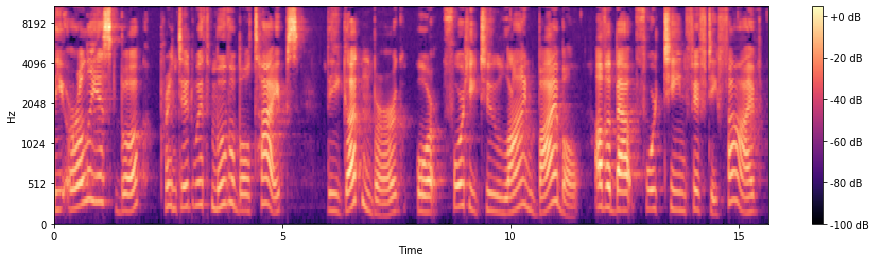

In [6]:
Logger._plot_spectrogram(melspec);

In [7]:
IPython.display.Audio(data=waveform, rate=hp.sample_rate)

## Inverse spectrogram test

In [8]:
inverse_spec = audio.inverse_spectrogram(spec)
IPython.display.Audio(data=inverse_spec, rate=hp.sample_rate)

In [9]:
inverse_melspec = audio.inverse_mel_spectrogram(melspec)
IPython.display.Audio(data=inverse_melspec, rate=hp.sample_rate)

# Analysis

In [10]:
#set full-width figure
sns.set(rc={'figure.figsize':(16,4)})
# set seaborn skin
sns.set_style("white")

In [11]:
stats.describe(durations)

DescribeResult(nobs=13094, minmax=(1.1100680272108843, 10.096190476190475), mean=6.5737682212032515, variance=4.77477607118989, skewness=-0.3480816826727948, kurtosis=-0.7843692940059563)

In [12]:
stats.describe(lengths)

DescribeResult(nobs=13094, minmax=(12, 187), mean=99.89552466778677, variance=1152.274427384521, skewness=-0.23695529173953872, kurtosis=-0.6341329742611084)

### Duration distribution

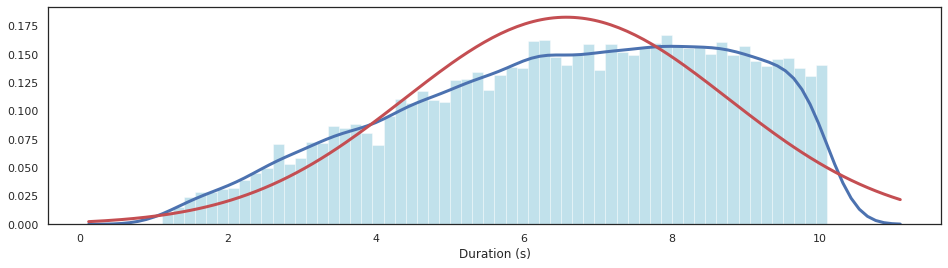

In [13]:
ax = sns.distplot(durations, bins=60, hist=True, rug=False, fit=stats.norm, color="c", kde_kws={"color": "b", "lw": 3}, fit_kws={"color": "r", "lw": 3})
ax.set(xlabel='Duration (s)');

###  Length distribution

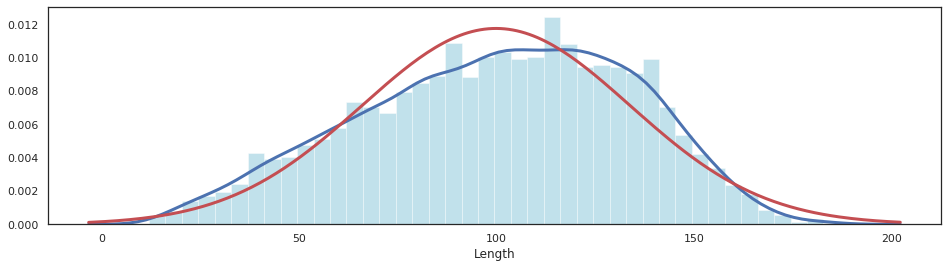

In [14]:
ax = sns.distplot(lengths, kde=True, rug=False, fit=stats.norm, color="c", kde_kws={"color": "b", "lw": 3}, fit_kws={"color": "r", "lw": 3})
ax.set(xlabel='Length');

### Word count distribution

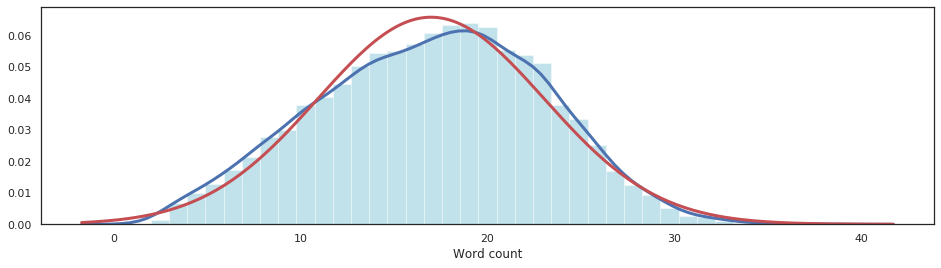

In [15]:
ax = sns.distplot(num_words, bins=max(num_words), kde=True, rug=False, fit=stats.norm, color="c", kde_kws={"color": "b", "lw": 3}, fit_kws={"color": "r", "lw": 3})
ax.set(xlabel='Word count');

### Phonemized length distribution

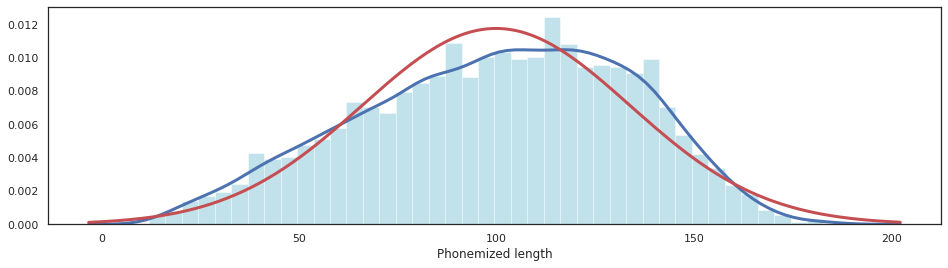

In [16]:
ax = sns.distplot(lengths_phon, kde=True, rug=False, fit=stats.norm, color="c", kde_kws={"color": "b", "lw": 3}, fit_kws={"color": "r", "lw": 3})
ax.set(xlabel='Phonemized length');

### Duration vs Length

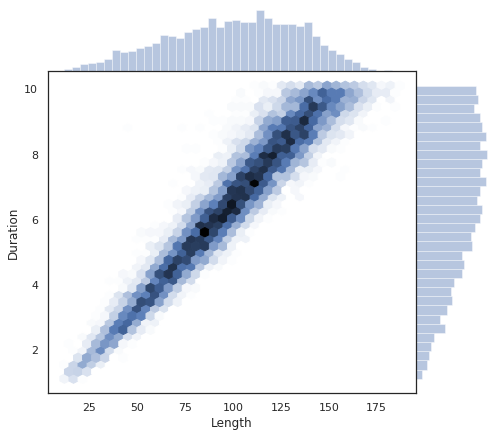

In [17]:
ax = sns.jointplot(lengths, durations, kind="hex", space=0, color="b")
ax.fig.set_figwidth(7)
ax.ax_joint.set(xlabel='Length', ylabel='Duration');

In [18]:
sns.set_style("whitegrid")

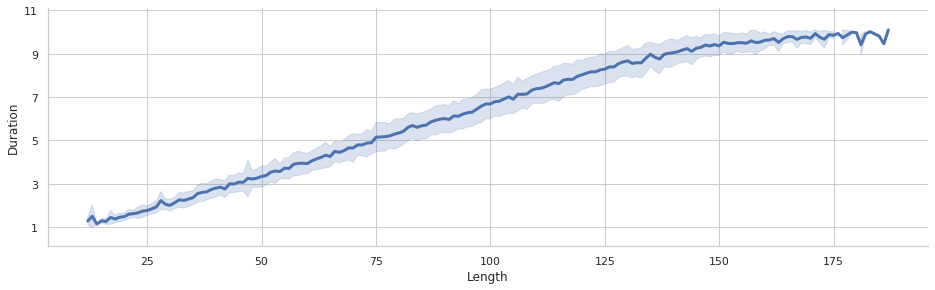

In [19]:
df = pd.DataFrame(list(zip(lengths, durations)), columns=['Length','Duration'])
ax = sns.relplot(x="Length", y="Duration", kind="line", ci="sd", linewidth=3, data=df)
ax.fig.set_figwidth(15)
ax.fig.set_figheight(4)
ax.set(yticks=np.arange(round(min(durations)), max(durations) + 1,2))
plt.ylim(min(durations) - 1, max(durations) + 1);

In [20]:
sns.set_style("white")

### Duration vs Phonemized length

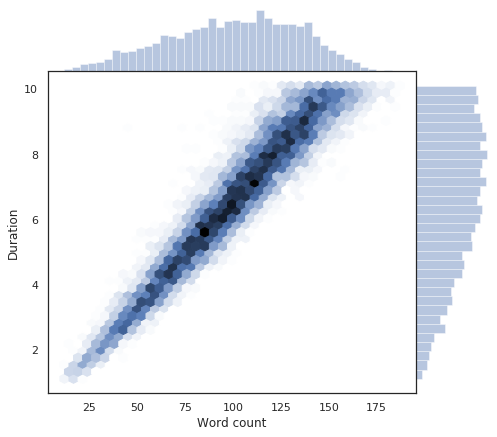

In [21]:
ax = sns.jointplot(lengths_phon, durations, kind="hex", space=0, color="b")
ax.fig.set_figwidth(7)
ax.ax_joint.set(xlabel='Word count', ylabel='Duration');

In [22]:
sns.set_style("whitegrid")

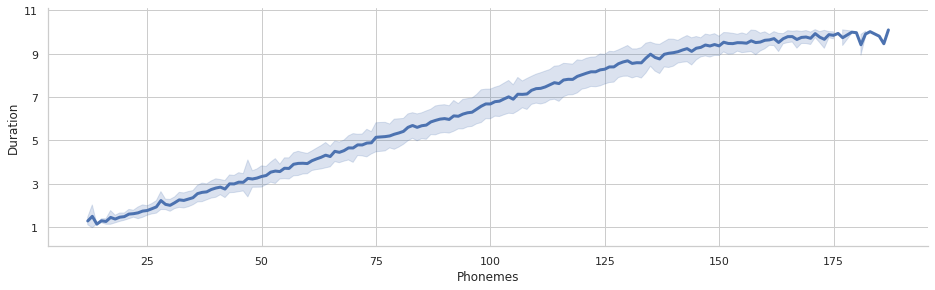

In [23]:
df = pd.DataFrame(list(zip(lengths_phon, durations)), columns=['Phonemes','Duration'])
ax = sns.relplot(x="Phonemes", y="Duration", kind="line", ci="sd", linewidth=3, data=df)
ax.fig.set_figwidth(15)
ax.fig.set_figheight(4)
ax.set(yticks=np.arange(round(min(durations)), max(durations) + 1, 2))
plt.ylim(min(durations) - 1, max(durations) + 1);

In [24]:
sns.set_style("white")

### Phonemes distribution

In [25]:
symbols_phon = hp.phonemes.replace(' ', '')
symbols_phon

'pbtdkɡfvθðszʃʒhmnŋn̩ll̩rjwʔɪeœɒʌʊiᵻːaɔuəɑɜˌˈ'

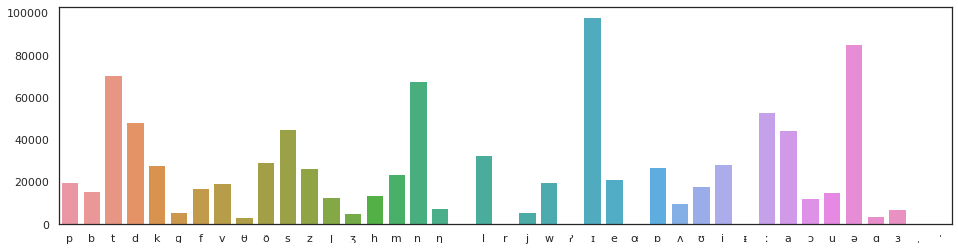

In [26]:
sns.barplot(x=list(symbols_phon), y=[freq_phon[x] for x in symbols_phon]);